<a href="https://colab.research.google.com/github/mishraShraddha/my_projects/blob/main/sentiment_analysis_of_financial_news_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis of Financial News Using NLTK

We have to predict the sentiment of fiancial news using nltk

#About Dataset

This dataset contains 3 csv file

cnbc headline   (3080, 3)

gaurdian headline   (17800, 2)

reuters headline   (32770, 3)


# Columns Provided in the Dataset

cnbc headline
1. time
2. headlines
3. Description

gaurdian headline
1. time
2. headline

reuters headline
1. time
2. headline
3. description


# What is NLTK ?

The Natural Language Toolkit (NLTK) is a platform used for building Python programs that work with human language data for applying in statistical natural language processing (NLP).

It contains text processing libraries for tokenization, parsing, classification, stemming, tagging and semantic reasoning.





# What is sentiment analysis ?

Sentiment analysis is the process of detecting positive or negative sentiment in text. It’s often used by businesses to detect sentiment in social data, gauge brand reputation, and understand customers.





In [127]:
# Import all the required libraries 

import numpy as np
import pandas as pd
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import stopwords and text processing libraries
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')





[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [128]:
#import machine learning libraries

import sklearn



# Basic EDA on cnbc_headlines dataset

In [129]:
# Read csv file of cnbc headlines using pandas
cnbc=pd.read_csv('cnbc_headlines.csv')

In [130]:
cnbc.head(10)

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,NaN,NaN,NaN
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."
5,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020","""Look for the stocks of high-quality companies..."
6,Cramer's lightning round: I would just stay lo...,"7:23 PM ET Thu, 16 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
7,Acorns CEO: Parents can turn $5 into five figu...,"8:03 PM ET Thu, 16 July 2020","Investing $5 per day can compound to $70,000 b..."
8,Dividend cuts may mean rethinking your retirem...,"8:54 AM ET Thu, 16 July 2020",Hundreds of companies have cut or suspended th...
9,NaN,NaN,NaN


In [131]:
# check the shape of cnbc headline dataset
cnbc.shape

(3080, 3)

In [132]:
# Check all the columns in the cnbc headline dataset
cnbc.columns

Index(['Headlines', 'Time', 'Description'], dtype='object')

In [133]:
# Check which columns are having categorical, numerical or boolean values
cnbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    2800 non-null   object
 1   Time         2800 non-null   object
 2   Description  2800 non-null   object
dtypes: object(3)
memory usage: 72.3+ KB


In [134]:
# Check for missing values in all the columnns of cnbc headline dataset
cnbc.isnull().sum()

Headlines      280
Time           280
Description    280
dtype: int64

There is 280 missing values in headlines, description and time

In [135]:
 # drop nan values in cnbc headline dataset
cnbc.dropna(inplace=True)

In [136]:
# drop the duplicate rows in the dataset keep the first one
cnbc.drop_duplicates(keep='first',inplace=True)

In [137]:
# check the shape of cnbc headline dataset
cnbc.shape

(2800, 3)

# Basic EDA on Gaurdian headlines dataset

In [138]:
# Read csv file of gaurdian headlines using pandas
guardian=pd.read_csv('guardian_headlines.csv')

In [139]:
guardian.head(5)

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...


In [140]:
#check the shape of gaurdian headline dataset
guardian.shape

(17800, 2)

In [141]:
#check columns of gaurdian headline
guardian.columns

Index(['Time', 'Headlines'], dtype='object')

In [142]:
# Check which columns are having categorical, numerical or boolean values
guardian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17800 entries, 0 to 17799
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Time       17800 non-null  object
 1   Headlines  17800 non-null  object
dtypes: object(2)
memory usage: 278.2+ KB


In [143]:
# check null values in gaurdian headlines dataset
guardian.isnull().sum()

Time         0
Headlines    0
dtype: int64

In [144]:
# drop duplicate rows in headlines and keep the first one
guardian.drop_duplicates(keep='first',inplace=True)

In [145]:
guardian.shape

(17800, 2)

# Basic EDA on reuters headlines

In [146]:
# Read csv file of reuters headlines using using pandas
reuters=pd.read_csv('reuters_headlines.csv')

In [147]:
reuters.head(5)

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...


In [148]:
#check the shape of reuters headlines dataset
reuters.shape

(32770, 3)

In [149]:
#check the columns of reuters headline dataset
reuters.columns

Index(['Headlines', 'Time', 'Description'], dtype='object')

In [150]:
# Check which columns are having categorical, numerical or boolean values
reuters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32770 entries, 0 to 32769
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    32770 non-null  object
 1   Time         32770 non-null  object
 2   Description  32770 non-null  object
dtypes: object(3)
memory usage: 768.2+ KB


In [151]:
# Check for missing values in all the columnns of reuters headlines dataset
reuters.isnull().sum()

Headlines      0
Time           0
Description    0
dtype: int64

In [152]:
#drop the duplicate rows in reuters headlines dataset and keep the first one
reuters.drop_duplicates(keep='first',inplace=True)
reuters.shape

(32715, 3)

#Making some functions that we will need  ahead

Preprocessing 

1. **Lowercase** - It is necessary to convert the text to lower case as it is case sensitive.

2. **remove punctuations** -  The punctuations present in the text do not add value to the data. The punctuation, when attached to any word, will create a problem in differentiating with other words. so we have to get rid of them.

3. **remove stopwords** -  Stopwords include: I, he, she, and, but, was were, being, have, etc, which do not add meaning to the data. So these words must be removed which helps to reduce the features from our data. These are removed after tokenizing the text.

4. **stemming** -  A technique that takes the word to its root form. It just removes suffixes from the words. The stemmed word might not be part of the dictionary, i.e it will not necessarily give meaning.

5. **lemmatizing** -  Takes the word to its root form called Lemma. It helps to bring words to their dictionary form. It is applied to nouns by default. It is more accurate as it uses more informed analysis to create groups of words with similar meanings based on the context, so it is complex and takes more time. This is used where we need to retain the contextual information.

In [153]:
# create a function for preprocessing 
def preprocessing(data):
  #convert all to lowercase
  data=data.lower()

  #remove puntuations
  data=re.sub(r'[^\w\s]','',data,flags=re.MULTILINE)

  #remove stopword
  tokens=word_tokenize(data)
  word_tokens=[w for w in tokens if w not in stopwords]

  #stemming
  stemmer=PorterStemmer()
  stem_words=[stemmer.stem(w) for w in word_tokens]


  #lemmitizing
  lemmer=WordNetLemmatizer()
  lem_words=[lemmer.lemmatize(w) for w in stem_words]

  return " ".join(lem_words)
  

SENTIMENT ANAYSIS

https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664

In [154]:
# import sentiment intensity analyzer
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# create sentiment intensity analyzer object

SIA=SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [155]:
#fuction to  decide sentiment as positive, negative and neutral
def decider(data):
    if data > 0:
        return "Positive"
    elif data < 0:
        return "Negative"
    else:
        return "Neutral"

def sentiment_analysis(df, colm_name):
    
    # assigning polarity scores for description column
    df['polarity_scores'] = df[colm_name].apply(lambda w: SIA.polarity_scores(w))
    
    # picking only compound score(combined score)
    df['compound_score'] = df['polarity_scores'].apply(lambda x: x['compound'])
    
    # mapping the compound score to positive, negative or neutral
    df['ds_score'] = df['compound_score'].apply(decider)
    
    df.drop(['polarity_scores', 'compound_score'], axis=1, inplace=True)
    
    return df

# Now working with description on datasets

In [156]:
# concatenate cnbc headlines dataset and reuters headline dataset
cnbc_reuters=pd.concat([cnbc,reuters],axis=0)

In [157]:
#check the shape of this new dataset
cnbc_reuters.shape

(35515, 3)

In [158]:
#make a copy of new dataset 
cnbc_reuters_1=cnbc_reuters.copy()

In [159]:
# apply preprocessing to the description of new dataset

cnbc_reuters_1['Description']=cnbc_reuters_1['Description'].apply(preprocessing)
cnbc_reuters_1

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...
5,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go lower even thou...
...,...,...,...
32765,Malaysia says never hired British data firm at...,Mar 20 2018,malaysian govern rule parti tuesday deni ever ...
32766,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,german prosecutor said tuesday search volkswag...
32767,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,mcdonald corp tuesday announc approv scienc ba...
32768,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,pratt whitney soon begin deliveri spare engin ...


In [160]:
# analyze polarity score of values in description and  add new column of it in dataset
df=sentiment_analysis(cnbc_reuters_1,'Description')
df

,Headlines,Time,Description,ds_score
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,Positive
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,Negative
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...,Positive
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...,Positive
5,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go lower even thou...,Negative
...,...,...,...,...
32765,Malaysia says never hired British data firm at...,Mar 20 2018,malaysian govern rule parti tuesday deni ever ...,Neutral
32766,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,german prosecutor said tuesday search volkswag...,Neutral
32767,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,mcdonald corp tuesday announc approv scienc ba...,Negative
32768,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,pratt whitney soon begin deliveri spare engin ...,Negative


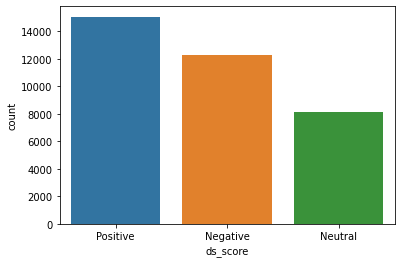

In [161]:
# plot a count plot on description score column
sns.countplot(x='ds_score',data=df);

In the description 

there are approx

15000 positive statment

12000 negative statment

8000 neutral statment

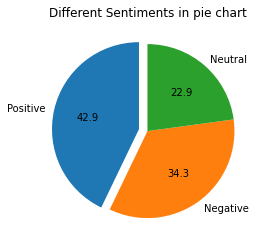

In [162]:
# pie chart on description score column
plt.pie([15000, 12000, 8000], explode=[0.1,0,0], labels=['Positive','Negative','Neutral'], autopct='%.1f', startangle=90)
plt.title("Different Sentiments in pie chart")
plt.show()

In the dataset 

description contains

42.9% positive statments

34.3% negtive statements

22.9% neutral statments

# Modelling on description 

In [163]:
# split the dataset  into test and train 
# 90% train , 10% test and random state 212
from sklearn.model_selection import train_test_split

x=df['Description']
y=df.ds_score

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=212)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(31963,) (3552,) (31963,) (3552,)


LINEAR SUPPORT VECTOR MACHINE


In [164]:
%%time
# pipeline creation
# 1. tfidVectorization
# 2. linearSVC model


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report,f1_score


# Fit the pipeline to the data
lin_svm_ds = Pipeline([('tfidf', TfidfVectorizer()),
                      ('lin_svm', LinearSVC())])

lin_svm_ds.fit(x_train, y_train)

# predict on test dataset
pred = lin_svm_ds.predict(x_test)

print("MODEL: LINEAR SVM")

# print accuracy score
print("accuarcy : ", accuracy_score(y_test, pred)*100,"%")

#print confusion matrix
print("Confusion matrix: ", confusion_matrix(y_test, pred))

#print classification report
print(classification_report(y_test, pred))

MODEL: LINEAR SVM
accuarcy :  93.2713963963964 %
Confusion matrix:  [[1123   45   71]
 [  22  762   20]
 [  50   31 1428]]
              precision    recall  f1-score   support

    Negative       0.94      0.91      0.92      1239
     Neutral       0.91      0.95      0.93       804
    Positive       0.94      0.95      0.94      1509

    accuracy                           0.93      3552
   macro avg       0.93      0.93      0.93      3552
weighted avg       0.93      0.93      0.93      3552

CPU times: user 1.41 s, sys: 67.6 ms, total: 1.48 s
Wall time: 1.48 s


LOGISTIC REGRESSION


In [165]:
%%time
# pipeline creation 
# 1. CountVectorization
# 2. TfidTransformer
# 3. Logistic Regression

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression


# Fit the pipeline to the data
log_reg_ds = Pipeline([('count_vec', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('log_reg', LogisticRegression())])

log_reg_ds.fit(x_train, y_train)

# predict on test dataset
pred = log_reg_ds.predict(x_test)

print("\nMODEL: LOGISTIC REGRESSION")

# print accuracy score
print("accuarcy : ", accuracy_score(y_test, pred)*100,"%")

#print confusion matrix
print("Confusion matrix: ", confusion_matrix(y_test, pred))

#print classification report
print(classification_report(y_test, pred))


 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,



MODEL: LOGISTIC REGRESSION
accuarcy :  89.3581081081081 %
Confusion matrix:  [[1054   78  107]
 [  39  728   37]
 [  69   48 1392]]
              precision    recall  f1-score   support

    Negative       0.91      0.85      0.88      1239
     Neutral       0.85      0.91      0.88       804
    Positive       0.91      0.92      0.91      1509

    accuracy                           0.89      3552
   macro avg       0.89      0.89      0.89      3552
weighted avg       0.89      0.89      0.89      3552

CPU times: user 7.95 s, sys: 20 s, total: 28 s
Wall time: 14.9 s


MULTINOMIAL NAIVE BAYES


In [166]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. MultinomialNB
 
from sklearn.naive_bayes import MultinomialNB


# Fit the pipeline to the data
multi_nb_ds = Pipeline([('count_vec', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('multi_nb', MultinomialNB())])

multi_nb_ds.fit(x_train, y_train)

# predict on test dataset
pred = multi_nb_ds.predict(x_test)

print("MODEL: Multinomial NAIVE BAYES")

# print accuracy score
print("accuarcy : ", accuracy_score(y_test, pred)*100,"%")

#print confusion matrix
print("Confusion matrix: ", confusion_matrix(y_test, pred))

#print classification report
print(classification_report(y_test, pred))
 


MODEL: Multinomial NAIVE BAYES
accuarcy :  63.96396396396396 %
Confusion matrix:  [[ 808    8  423]
 [ 150   86  568]
 [ 128    3 1378]]
              precision    recall  f1-score   support

    Negative       0.74      0.65      0.70      1239
     Neutral       0.89      0.11      0.19       804
    Positive       0.58      0.91      0.71      1509

    accuracy                           0.64      3552
   macro avg       0.74      0.56      0.53      3552
weighted avg       0.71      0.64      0.59      3552

CPU times: user 976 ms, sys: 31 ms, total: 1.01 s
Wall time: 1.01 s


BERNOULLI NAIVE BAYES


In [167]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. BernoulliNB

from sklearn.naive_bayes import BernoulliNB

# fit the pipeline to the train data
bern_nb_ds=Pipeline([('count_vec',CountVectorizer()),
                     ('tfid',TfidfTransformer()),
                     ('bern_nb',BernoulliNB())])

bern_nb_ds.fit(x_train,y_train)

#predict on test dataset
pred=bern_nb_ds.predict(x_test)

print("MODEL: BERNOULLIS NAIVE BAYES")

#print accuracy
print("accuracy: ",accuracy_score(y_test,pred)*100,"%")

#print confusion matrix

print("confusion matrix: ",confusion_matrix(y_test,pred))

# print classification report
print(classification_report(y_test,pred))


MODEL: BERNOULLIS NAIVE BAYES
accuracy:  73.95833333333334 %
confusion matrix:  [[ 919   56  264]
 [ 135  480  189]
 [ 210   71 1228]]
              precision    recall  f1-score   support

    Negative       0.73      0.74      0.73      1239
     Neutral       0.79      0.60      0.68       804
    Positive       0.73      0.81      0.77      1509

    accuracy                           0.74      3552
   macro avg       0.75      0.72      0.73      3552
weighted avg       0.74      0.74      0.74      3552

CPU times: user 984 ms, sys: 25 ms, total: 1.01 s
Wall time: 1.01 s


GRADIENT BOOSTING CLASSIFICATION MODEL


In [168]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. GradientBoostingClassifier

from sklearn.ensemble import GradientBoostingClassifier
# Fit the pipeline to the data
gbc_ds=Pipeline([('count_vec',CountVectorizer()),
                 ('tfid',TfidfTransformer()),
                 ('gbc',GradientBoostingClassifier())])

gbc_ds.fit(x_train,y_train)

# predict on test data
pred=gbc_ds.predict(x_test)

print("MODEL: GRADIENT BOOST")

#print accuracy
print("accuracy: ",accuracy_score(y_test,pred)*100,"%")

#print confusion matrix
print("confusion matrix: ",confusion_matrix(y_test,pred))

# print classification report
print(classification_report(y_test,pred))

MODEL: GRADIENT BOOST
accuracy:  83.78378378378379 %
confusion matrix:  [[ 902  168  169]
 [  11  784    9]
 [  69  150 1290]]
              precision    recall  f1-score   support

    Negative       0.92      0.73      0.81      1239
     Neutral       0.71      0.98      0.82       804
    Positive       0.88      0.85      0.87      1509

    accuracy                           0.84      3552
   macro avg       0.84      0.85      0.83      3552
weighted avg       0.85      0.84      0.84      3552

CPU times: user 1min 19s, sys: 1.99 s, total: 1min 21s
Wall time: 1min 20s


XGBOOST CLASSIFICATION MODEL


In [169]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. XGBClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Fit the pipeline to the data
xgb_ds=Pipeline([('count_vec',CountVectorizer()),
                 ('tfid',TfidfTransformer()),
                 ('xgb',XGBClassifier())])

encode=LabelEncoder()
enc_train=encode.fit_transform(y_train)
enc_test=encode.fit_transform(y_test)

xgb_ds.fit(x_train,enc_train)

# predict on test data
pred=xgb_ds.predict(x_test)

print("MODEL: XGBOOST")
#print accuracy
print("accuracy: ",accuracy_score(enc_test,pred)*100,"%")

#print confusion matrix
print("confusion matrix: ",confusion_matrix(enc_test,pred))

# print classification report
print(classification_report(enc_test,pred))

MODEL: XGBOOST
accuracy:  80.51801801801803 %
confusion matrix:  [[ 845  205  189]
 [  11  784    9]
 [  67  211 1231]]
              precision    recall  f1-score   support

           0       0.92      0.68      0.78      1239
           1       0.65      0.98      0.78       804
           2       0.86      0.82      0.84      1509

    accuracy                           0.81      3552
   macro avg       0.81      0.82      0.80      3552
weighted avg       0.83      0.81      0.81      3552

CPU times: user 32.8 s, sys: 74.5 ms, total: 32.9 s
Wall time: 32.7 s


DECISION TREE CLASSIFICATION MODEL


In [170]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. Decision tree classifier

from sklearn.tree import DecisionTreeClassifier

dec_tree_class_ds=Pipeline([('count_vec',CountVectorizer()),
                         ('tfid',TfidfTransformer()),
                         ('dec_tree_class',DecisionTreeClassifier())])


# Fit the pipeline to the data
dec_tree_class_ds.fit(x_train,y_train)

# predict on test data
pred=dec_tree_class_ds.predict(x_test)

print("MODEL: DECISION TREE")

#print accuracy
print("accuracy: ",accuracy_score(y_test,pred)*100,"%")

#print confusion matrix
print("confusion matrix: ",confusion_matrix(y_test,pred))

# print classification report
print(classification_report(y_test,pred))

MODEL: DECISION TREE
accuracy:  87.66891891891892 %
confusion matrix:  [[1015   17  207]
 [  11  781   12]
 [ 178   13 1318]]
              precision    recall  f1-score   support

    Negative       0.84      0.82      0.83      1239
     Neutral       0.96      0.97      0.97       804
    Positive       0.86      0.87      0.87      1509

    accuracy                           0.88      3552
   macro avg       0.89      0.89      0.89      3552
weighted avg       0.88      0.88      0.88      3552

CPU times: user 19.8 s, sys: 27.1 ms, total: 19.8 s
Wall time: 19.7 s


K- NEAREST NEIGHBOUR CLASSIFIER MODEL


In [171]:
%%time
from numpy.ma.core import count

# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. KNN classifier

from sklearn.neighbors import KNeighborsClassifier 

# Fit the pipeline to the data
knn_ds=Pipeline([('count_vec',CountVectorizer()),
                 ('tfid',TfidfTransformer()),
                 ('knn',KNeighborsClassifier(n_neighbors=100))])

knn_ds.fit(x_train,y_train)

# predict on test data
pred=knn_ds.predict(x_test)

print("MODEL: K NEAREST NEIGHBOR")

#print accuracy
print("accuracy: ",accuracy_score(y_test,pred)*100,"%")

#print confusion matrix
print("confusion matrix: ",confusion_matrix(y_test,pred))

# print classification report
print(classification_report(y_test,pred))

MODEL: K NEAREST NEIGHBOR
accuracy:  60.95157657657657 %
confusion matrix:  [[ 759   50  430]
 [ 157  158  489]
 [ 204   57 1248]]
              precision    recall  f1-score   support

    Negative       0.68      0.61      0.64      1239
     Neutral       0.60      0.20      0.30       804
    Positive       0.58      0.83      0.68      1509

    accuracy                           0.61      3552
   macro avg       0.62      0.55      0.54      3552
weighted avg       0.62      0.61      0.58      3552

CPU times: user 5.24 s, sys: 28.1 ms, total: 5.27 s
Wall time: 5.24 s


In [172]:
# helper function for comparing models matric

def helper(model_objects, model_names, x_test, y_test, enc_test):
    
    # create a dataframe with column matric and metric name as value
    metrics_df = pd.DataFrame(columns=['model_names','accuracy','precision','recall','f1_score'])
    metrics_df['model_names'] = model_names
   
    # then predict on the test set
    metrics_df['accuracy'] = [accuracy_score(y_test, model.predict(x_test)) if model != xgb_ds else accuracy_score(enc_test, model.predict(x_test)) for model in model_objects]
    metrics_df['precision'] = [precision_score(y_test, model.predict(x_test),average='weighted') if model != xgb_ds else precision_score(enc_test, model.predict(x_test), average='weighted') for model in model_objects]
    metrics_df['recall'] = [recall_score(y_test, model.predict(x_test),average='weighted') if model != xgb_ds else recall_score(enc_test, model.predict(x_test),average='weighted') for model in model_objects]
    metrics_df['f1_score'] = [f1_score(y_test, model.predict(x_test),average='weighted') if model != xgb_ds else f1_score(enc_test, model.predict(x_test), average='weighted') for model in model_objects]
    
    return metrics_df
    

In [173]:
# list of model objects
model_objects = [lin_svm_ds, log_reg_ds, multi_nb_ds, bern_nb_ds, gbc_ds, xgb_ds,dec_tree_class_ds,knn_ds]

# list of model names
model_names = ['LinearSVM', 'LogRegression','MultinomialNB','BernoulliNB','GradientBoost','XGBoost','Decisiontree','KNN']

# print the comparison of models
met_df = helper(model_objects,model_names, x_test, y_test, enc_test)
met_df



,model_names,accuracy,precision,recall,f1_score
0,LinearSVM,0.932714,0.933004,0.932714,0.932659
1,LogRegression,0.893581,0.894356,0.893581,0.893442
2,MultinomialNB,0.639640,0.707324,0.639640,0.587574
3,BernoulliNB,0.739583,0.742950,0.739583,0.737226
4,GradientBoost,0.837838,0.854754,0.837838,0.837715
5,XGBoost,0.805180,0.833190,0.805180,0.805772
6,Decisiontree,0.876689,0.876338,0.876689,0.876419
7,KNN,0.609516,0.616008,0.609516,0.579832


From above metrics comparison, we could confirm that Linear SVM(Support Vector Machine) model performs better than all other models

# working with test dataset

In [174]:
# Perforn the prediction on the test dataset
pred=lin_svm_ds.predict(x_test)
pred

array(['Negative', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype=object)

In [175]:
# creating a dataframe of predicted results 
pred=pd.DataFrame(pred,columns=['Prediction'])


In [176]:
pred

,Prediction
0,Negative
1,Positive
2,Positive
3,Positive
4,Negative
...,...
3547,Negative
3548,Positive
3549,Positive
3550,Positive


# Now working with headlines + description

In [177]:
# merge headlines and description of new dataset and name it info
cnbc_reuters_1['info']=cnbc_reuters_1['Headlines'] + ' ' + cnbc_reuters_1['Description']
cnbc_reuters_1

,Headlines,Time,Description,ds_score,info
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,Positive,Jim Cramer: A better way to invest in the Covi...
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,Negative,Cramer's lightning round: I would own Teradyne...
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...,Positive,"Cramer's week ahead: Big week for earnings, ev..."
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...,Positive,IQ Capital CEO Keith Bliss says tech and healt...
5,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go lower even thou...,Negative,Wall Street delivered the 'kind of pullback I'...
...,...,...,...,...,...
32765,Malaysia says never hired British data firm at...,Mar 20 2018,malaysian govern rule parti tuesday deni ever ...,Neutral,Malaysia says never hired British data firm at...
32766,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,german prosecutor said tuesday search volkswag...,Neutral,Prosecutors search Volkswagen headquarters in ...
32767,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,mcdonald corp tuesday announc approv scienc ba...,Negative,McDonald's sets greenhouse gas reduction targe...
32768,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,pratt whitney soon begin deliveri spare engin ...,Negative,Pratt & Whitney to deliver spare A320neo engin...


In [178]:
# only keep info and time column . drop all remaining columns
cnbc_reuters_2=cnbc_reuters_1.drop(['Headlines','Description','ds_score'],axis=1)
cnbc_reuters_2.head()

,Time,info
0,"7:51 PM ET Fri, 17 July 2020",Jim Cramer: A better way to invest in the Covi...
1,"7:33 PM ET Fri, 17 July 2020",Cramer's lightning round: I would own Teradyne...
3,"7:25 PM ET Fri, 17 July 2020","Cramer's week ahead: Big week for earnings, ev..."
4,"4:24 PM ET Fri, 17 July 2020",IQ Capital CEO Keith Bliss says tech and healt...
5,"7:36 PM ET Thu, 16 July 2020",Wall Street delivered the 'kind of pullback I'...


In [179]:
# apply preprocessing on info column
cnbc_reuters_2['info']=cnbc_reuters_2['info'].apply(preprocessing)
cnbc_reuters_2.head()

,Time,info
0,"7:51 PM ET Fri, 17 July 2020",jim cramer better way invest covid19 vaccin go...
1,"7:33 PM ET Fri, 17 July 2020",cramer lightn round would teradyn mad money ho...
3,"7:25 PM ET Fri, 17 July 2020",cramer week ahead big week earn even bigger we...
4,"4:24 PM ET Fri, 17 July 2020",iq capit ceo keith bliss say tech healthcar ra...
5,"7:36 PM ET Thu, 16 July 2020",wall street deliv kind pullback ive wait jim c...


In [180]:
# analyze polarity score of values in info and  add new column of it in dataset
cnbc_reuters_2=sentiment_analysis(cnbc_reuters_2,'info')
cnbc_reuters_2.head()

,Time,info,ds_score
0,"7:51 PM ET Fri, 17 July 2020",jim cramer better way invest covid19 vaccin go...,Positive
1,"7:33 PM ET Fri, 17 July 2020",cramer lightn round would teradyn mad money ho...,Negative
3,"7:25 PM ET Fri, 17 July 2020",cramer week ahead big week earn even bigger we...,Positive
4,"4:24 PM ET Fri, 17 July 2020",iq capit ceo keith bliss say tech healthcar ra...,Positive
5,"7:36 PM ET Thu, 16 July 2020",wall street deliv kind pullback ive wait jim c...,Negative


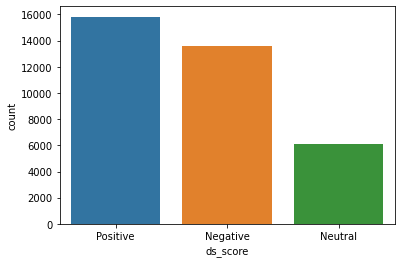

In [181]:
# perform count plot on ds_score column
sns.countplot(x='ds_score',data=cnbc_reuters_2);

In the info

there are approx

15900 positive statment

13500 negative statment

6000 neutral statment

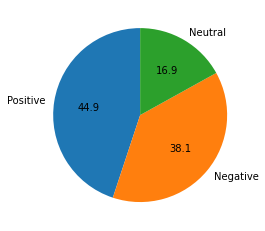

In [182]:
# perform pie chart on info_score column
plt.pie([15900, 13500, 6000],labels=['Positive','Negative','Neutral'], autopct='%.1f', startangle=90)
plt.show()

In the dataset

info contains

44.9% positive statments

38.1% negtive statements

16.9% neutral statments

# modeling on headlines + description

In [183]:
# split the dataset  into test and train 
# 90% train , 10% test and random state 212
x=cnbc_reuters_2['info']
y=cnbc_reuters_2.ds_score

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=212)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(31963,) (3552,) (31963,) (3552,)


LINEAR SUPPORT VECTOR MACHINE


In [184]:

%%time
# pipeline creation
# 1. tfidVectorization
# 2. linearSVC model


# Fit the pipline to the data
lin_svm_info=Pipeline([('tfid',TfidfVectorizer()),
                       ('lin_svm',LinearSVC())])

lin_svm_info.fit(x_train,y_train)

#predict on test dataset
pred=lin_svm_info.predict(x_test)

print("MODEL: LINEAR SVM")

#print accuracy
print("accuracy: ",accuracy_score(y_test,pred)*100,"%")
#print confusion matrix
print("confusion matrix: ",confusion_matrix(y_test,pred))
# print classification report
print(classification_report(y_test,pred))

MODEL: LINEAR SVM
accuracy:  90.1463963963964 %
confusion matrix:  [[1212   45   91]
 [  40  502   52]
 [  73   49 1488]]
              precision    recall  f1-score   support

    Negative       0.91      0.90      0.91      1348
     Neutral       0.84      0.85      0.84       594
    Positive       0.91      0.92      0.92      1610

    accuracy                           0.90      3552
   macro avg       0.89      0.89      0.89      3552
weighted avg       0.90      0.90      0.90      3552

CPU times: user 1.69 s, sys: 28.5 ms, total: 1.72 s
Wall time: 1.72 s


LOGISTIC REGRESSION


In [185]:
%%time
# pipeline creation 
# 1. CountVectorization
# 2. TfidTransformer
# 3. Logistic Regression

# Fit the pipeline to the data
log_reg_info=Pipeline([('count_vec',CountVectorizer()),
                       ('tfid',TfidfTransformer()),
                       ('log_reg',LogisticRegression())])

log_reg_info.fit(x_train,y_train)
#predict on test data
pred=log_reg_info.predict(x_test)
print("MODEL: LOGISTIC REGRESSION")
#print accuracy
print("accuracy: ",accuracy_score(y_test,pred)*100,"%")
#print confusion matrix
print("confusion matrix: ",confusion_matrix(y_test,pred))
# print classification report
print(classification_report(y_test,pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


MODEL: LOGISTIC REGRESSION
accuracy:  86.93693693693693 %
confusion matrix:  [[1187   48  113]
 [  78  432   84]
 [  92   49 1469]]
              precision    recall  f1-score   support

    Negative       0.87      0.88      0.88      1348
     Neutral       0.82      0.73      0.77       594
    Positive       0.88      0.91      0.90      1610

    accuracy                           0.87      3552
   macro avg       0.86      0.84      0.85      3552
weighted avg       0.87      0.87      0.87      3552

CPU times: user 7.49 s, sys: 7.5 s, total: 15 s
Wall time: 8.34 s


MULTINOMIAL NAIVE BAYES


In [186]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. MultinomialNB


# Fit the pipeline to the data
multi_nb_info=Pipeline([('count_vec',CountVectorizer()),
                         ('tfid',TfidfTransformer()),
                         ('multi_nb',MultinomialNB())])
multi_nb_info.fit(x_train,y_train)
#predict on test data
pred=multi_nb_info.predict(x_test)
print("MODEL :MULTINOMIAL NAIVE BAYES")
#print accuracy
print("accuracy: ",accuracy_score(y_test,pred)*100,"%")
#print confusion matrix
print("confusion matrix: ",confusion_matrix(y_test,pred))
# print classification report
print(classification_report(y_test,pred))

MODEL :MULTINOMIAL NAIVE BAYES
accuracy:  66.97635135135135 %
confusion matrix:  [[ 958    0  390]
 [ 160   13  421]
 [ 202    0 1408]]
              precision    recall  f1-score   support

    Negative       0.73      0.71      0.72      1348
     Neutral       1.00      0.02      0.04       594
    Positive       0.63      0.87      0.74      1610

    accuracy                           0.67      3552
   macro avg       0.79      0.54      0.50      3552
weighted avg       0.73      0.67      0.61      3552

CPU times: user 1.17 s, sys: 26.9 ms, total: 1.2 s
Wall time: 1.19 s


BERNOULLI NAIVE BAYES


In [187]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. BernoulliNB

# Fit the pipeline to the data
 
bern_nb_info=Pipeline([('count_vec',CountVectorizer()),
                         ('tfid',TfidfTransformer()),
                         ('bern_nb',BernoulliNB())])
bern_nb_info.fit(x_train,y_train)
#predict on test data
pred=bern_nb_info.predict(x_test)
print("MODEL :BERNOULLIS NAIVE BAYES")
#print accuracy
print("accuracy: ",accuracy_score(y_test,pred)*100,"%")
#print confusion matrix
print("confusion matrix: ",confusion_matrix(y_test,pred))
# print classification report
print(classification_report(y_test,pred))
 

MODEL :BERNOULLIS NAIVE BAYES
accuracy:  72.12837837837837 %
confusion matrix:  [[1007   47  294]
 [ 137  285  172]
 [ 269   71 1270]]
              precision    recall  f1-score   support

    Negative       0.71      0.75      0.73      1348
     Neutral       0.71      0.48      0.57       594
    Positive       0.73      0.79      0.76      1610

    accuracy                           0.72      3552
   macro avg       0.72      0.67      0.69      3552
weighted avg       0.72      0.72      0.72      3552

CPU times: user 1.21 s, sys: 26.9 ms, total: 1.23 s
Wall time: 1.23 s


GRADIENT BOOSTING CLASSIFICATION MODEL


In [188]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. GradientBoostingClassifier

# Fit the pipeline to the data
gbc_info=Pipeline([('count_vec',CountVectorizer()),
                         ('tfid',TfidfTransformer()),
                         ('gbc',GradientBoostingClassifier())])
gbc_info.fit(x_train,y_train)
#predict on test data
pred=gbc_info.predict(x_test)
print("MODEL :GRADIENT BOOST")
#print accuracy
print("accuracy: ",accuracy_score(y_test,pred)*100,"%")
#print confusion matrix
print("confusion matrix: ",confusion_matrix(y_test,pred))
# print classification report
print(classification_report(y_test,pred))

 

MODEL :GRADIENT BOOST
accuracy:  71.81869369369369 %
confusion matrix:  [[ 982   25  341]
 [   4   96  494]
 [ 117   20 1473]]
              precision    recall  f1-score   support

    Negative       0.89      0.73      0.80      1348
     Neutral       0.68      0.16      0.26       594
    Positive       0.64      0.91      0.75      1610

    accuracy                           0.72      3552
   macro avg       0.74      0.60      0.60      3552
weighted avg       0.74      0.72      0.69      3552

CPU times: user 1min 32s, sys: 3.82 s, total: 1min 36s
Wall time: 1min 36s


XGBOOST CLASSIFICATION MODEL


In [189]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. XGBClassifier

# Fit the pipeline to the data
xgb_info = Pipeline([('count_vec', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('xgb', XGBClassifier())])

encoder = LabelEncoder()
enc_train = encoder.fit_transform(y_train)
enc_test = encoder.fit_transform(y_test)

xgb_info.fit(x_train, enc_train)

# predict on test dataset
pred = xgb_info.predict(x_test)

print("MODEL: XG Boost")

# print accuracy score
print("accuarcy score: ", accuracy_score(enc_test, pred)*100,"%")

#print confusion matrix
print("Confusion matrix: ", confusion_matrix(enc_test, pred))

#print classification report
print(classification_report(enc_test, pred))


MODEL: XG Boost
accuarcy score:  68.58108108108108 %
Confusion matrix:  [[ 935    0  413]
 [   4    4  586]
 [ 113    0 1497]]
              precision    recall  f1-score   support

           0       0.89      0.69      0.78      1348
           1       1.00      0.01      0.01       594
           2       0.60      0.93      0.73      1610

    accuracy                           0.69      3552
   macro avg       0.83      0.54      0.51      3552
weighted avg       0.78      0.69      0.63      3552

CPU times: user 37.7 s, sys: 46.8 ms, total: 37.8 s
Wall time: 37.6 s


DECISION TREE CLASSIFICATION MODEL


In [190]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. Decision tree classifier

# Fit the pipeline to the data

dec_tree_class_info=Pipeline([('count_vec',CountVectorizer()),
                         ('tfid',TfidfTransformer()),
                         ('dec_tree_class',DecisionTreeClassifier())])


# Fit the pipeline to the data
dec_tree_class_info.fit(x_train,y_train)

# predict on test data
pred=dec_tree_class_info.predict(x_test)

print("MODEL: DECISION TREE")

#print accuracy
print("accuracy: ",accuracy_score(y_test,pred)*100,"%")

#print confusion matrix
print("confusion matrix: ",confusion_matrix(y_test,pred))

# print classification report
print(classification_report(y_test,pred))

MODEL: DECISION TREE
accuracy:  83.13626126126125 %
confusion matrix:  [[1053   34  261]
 [  18  566   10]
 [ 256   20 1334]]
              precision    recall  f1-score   support

    Negative       0.79      0.78      0.79      1348
     Neutral       0.91      0.95      0.93       594
    Positive       0.83      0.83      0.83      1610

    accuracy                           0.83      3552
   macro avg       0.85      0.85      0.85      3552
weighted avg       0.83      0.83      0.83      3552

CPU times: user 20.6 s, sys: 17 ms, total: 20.6 s
Wall time: 20.5 s


K- NEAREST NEIGHBOUR CLASSIFIER MODEL


In [191]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. KNN classifier


# Fit the pipeline to the data

knn_info=Pipeline([('count_vec',CountVectorizer()),
                         ('tfid',TfidfTransformer()),
                         ('knn',KNeighborsClassifier(n_neighbors=100))])


# Fit the pipeline to the data
knn_info.fit(x_train,y_train)

# predict on test data
pred=knn_info.predict(x_test)

print("MODEL: K NEAREST NEIGHBOR")

#print accuracy
print("accuracy: ",accuracy_score(y_test,pred)*100,"%")

#print confusion matrix
print("confusion matrix: ",confusion_matrix(y_test,pred))

# print classification report
print(classification_report(y_test,pred))

MODEL: K NEAREST NEIGHBOR
accuracy:  61.458333333333336 %
confusion matrix:  [[ 861    7  480]
 [ 155   17  422]
 [ 297    8 1305]]
              precision    recall  f1-score   support

    Negative       0.66      0.64      0.65      1348
     Neutral       0.53      0.03      0.05       594
    Positive       0.59      0.81      0.68      1610

    accuracy                           0.61      3552
   macro avg       0.59      0.49      0.46      3552
weighted avg       0.61      0.61      0.56      3552

CPU times: user 5.45 s, sys: 28.8 ms, total: 5.48 s
Wall time: 5.44 s


In [192]:
# helper function for comparing models matric
def help(model_objects, model_names, x_test, y_test, enc_test):
    
    # create a dataframe with column matric and metric name as value
    metrics_df = pd.DataFrame(columns=['model_names','accuracy','precision','recall','f1_score'])
    metrics_df['model_names'] = model_names
   
    # then predict on the test set
    metrics_df['accuracy'] = [accuracy_score(y_test, model.predict(x_test)) if model != xgb_info else accuracy_score(enc_test, model.predict(x_test)) for model in model_objects]
    metrics_df['precision'] = [precision_score(y_test, model.predict(x_test),average='weighted') if model != xgb_info else precision_score(enc_test, model.predict(x_test), average='weighted') for model in model_objects]
    metrics_df['recall'] = [recall_score(y_test, model.predict(x_test),average='weighted') if model != xgb_info else recall_score(enc_test, model.predict(x_test),average='weighted') for model in model_objects]
    metrics_df['f1_score'] = [f1_score(y_test, model.predict(x_test),average='weighted') if model != xgb_info else f1_score(enc_test, model.predict(x_test), average='weighted') for model in model_objects]
    
    return metrics_df
    

In [193]:
# list of model objects
model_objects = [lin_svm_info, log_reg_info, multi_nb_info, bern_nb_info, gbc_info, xgb_info,dec_tree_class_info,knn_info]

# list of model names
model_names = ['LinearSVM', 'LogRegression','MultinomialNB','BernoulliNB','GradientBoost','XGBoost','Decisiontree','KNN']

# print the comparison of models
met_info_df = help(model_objects,model_names, x_test, y_test, enc_test)
met_info_df


,model_names,accuracy,precision,recall,f1_score
0,LinearSVM,0.901464,0.901519,0.901464,0.901448
1,LogRegression,0.869369,0.868196,0.869369,0.868227
2,MultinomialNB,0.669764,0.730264,0.669764,0.613051
3,BernoulliNB,0.721284,0.720319,0.721284,0.716517
4,GradientBoost,0.718187,0.741012,0.718187,0.688601
5,XGBoost,0.685811,0.776377,0.685811,0.628445
6,Decisiontree,0.831363,0.830542,0.831363,0.830861
7,KNN,0.614583,0.605717,0.614583,0.564605


# working with test data

In [194]:
# Perforn the prediction on the test dataset
pred=lin_svm_info.predict(x_test)
pred

array(['Negative', 'Negative', 'Positive', ..., 'Neutral', 'Positive',
       'Positive'], dtype=object)

In [195]:
# creating a dataframe of predicted results 
preds=pd.DataFrame(pred,columns=['prediction'])

In [196]:
preds

,prediction
0,Negative
1,Negative
2,Positive
3,Positive
4,Negative
...,...
3547,Negative
3548,Positive
3549,Neutral
3550,Positive


# now working on headlines

In [197]:
# from the dataset you have copied before delete the column of description
c_r=cnbc_reuters.drop(['Description'],axis=1)
c_r.head(5)

,Headlines,Time
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020"
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020"
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020"
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020"
5,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020"


In [198]:
# cancatenate the gaurdian headlines dataset and  copy of datasetto get all headlines together
head_df=pd.concat([guardian,c_r],axis=0)

In [199]:
head_df.head(5)

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...


In [200]:
# check the shape of all headlines dataset
head_df.shape

(53315, 2)

In [201]:
#apply preprocessin to the headlines column in the new dataset
head_df['Headlines']=head_df['Headlines'].apply(preprocessing)

In [202]:
# analyze polarity score of values in headlines and  add new column of it in dataset
headlines_df=sentiment_analysis(head_df,'Headlines')


In [203]:
headlines_df.head(5)


,Time,Headlines,ds_score
0,18-Jul-20,johnson ask santa christma recoveri,Neutral
1,18-Jul-20,fear worst four grim tale work life upend covid19,Negative
2,18-Jul-20,five key area sunak must tackl serv econom rec...,Neutral
3,18-Jul-20,covid19 leav firm fatal illprepar nodeal brexit,Negative
4,18-Jul-20,week patriarchi bacardi ladi vodka latest long...,Negative


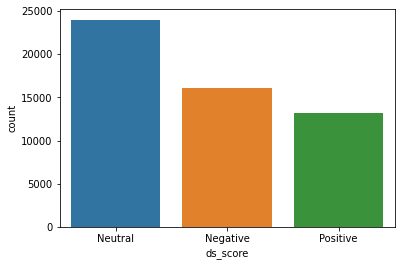

In [204]:
#perform countplot on headline score column
sns.countplot(x='ds_score',data=headlines_df)


In [205]:
headlines_df['ds_score'].value_counts()

Neutral     23986
Negative    16115
Positive    13214
Name: ds_score, dtype: int64

In the headlines

there are approx

13214 positive statment

16115 negative statment

23986 neutral statment

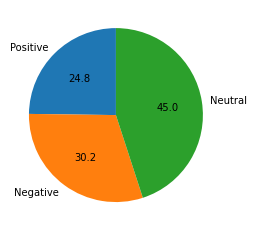

In [206]:
#perform pie digram on headline score column
plt.pie([13214, 16115, 23986],labels=['Positive','Negative','Neutral'], autopct='%.1f', startangle=90)
plt.show()


In the dataset

headlines contains

24.8% positive statments

30.3% negtive statements

44.9% neutral statments

# Modeling on headlines

In [207]:
# split the dataset  into test and train 
# 90% train , 10% test and random state 212

x = headlines_df['Headlines']
y = headlines_df.ds_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=212)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(47983,) (5332,) (47983,) (5332,)


LINEAR SUPPORT VECTOR MACHINE

In [208]:
%%time
# pipeline creation
# 1. tfidVectorization
# 2. linearSVC model


# Fit the pipeline to the data
lin_svm_head=Pipeline([('tfid',TfidfVectorizer()),
                       ('lin_svm',LinearSVC())])

lin_svm_head.fit(x_train,y_train)

#predict on test dataset
pred=lin_svm_head.predict(x_test)

print("MODEL: LINEAR SVM")

#print accuracy
print("accuracy: ",accuracy_score(y_test,pred)*100,"%")
#print confusion matrix
print("confusion matrix: ",confusion_matrix(y_test,pred))
# print classification report
print(classification_report(y_test,pred))



MODEL: LINEAR SVM
accuracy:  97.03675918979745 %
confusion matrix:  [[1510   29   53]
 [   5 2341    9]
 [  42   20 1323]]
              precision    recall  f1-score   support

    Negative       0.97      0.95      0.96      1592
     Neutral       0.98      0.99      0.99      2355
    Positive       0.96      0.96      0.96      1385

    accuracy                           0.97      5332
   macro avg       0.97      0.97      0.97      5332
weighted avg       0.97      0.97      0.97      5332

CPU times: user 1.4 s, sys: 2.93 ms, total: 1.4 s
Wall time: 1.4 s


LOGISTIC REGRESSION

In [209]:
%%time
# pipeline creation 
# 1. CountVectorization
# 2. TfidTransformer
# 3. Logistic Regression

# Fit the pipeline to the data
log_reg_head=Pipeline([('count_vec',CountVectorizer()),
                       ('tfid',TfidfTransformer()),
                       ('log_reg',LogisticRegression())])

log_reg_head.fit(x_train,y_train)
#predict on test data
pred=log_reg_head.predict(x_test)
print("MODEL: LOGISTIC REGRESSION")
#print accuracy
print("accuracy: ",accuracy_score(y_test,pred)*100,"%")
#print confusion matrix
print("confusion matrix: ",confusion_matrix(y_test,pred))
# print classification report
print(classification_report(y_test,pred))


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


MODEL: LOGISTIC REGRESSION
accuracy:  93.21080270067516 %
confusion matrix:  [[1412  118   62]
 [   5 2341    9]
 [  57  111 1217]]
              precision    recall  f1-score   support

    Negative       0.96      0.89      0.92      1592
     Neutral       0.91      0.99      0.95      2355
    Positive       0.94      0.88      0.91      1385

    accuracy                           0.93      5332
   macro avg       0.94      0.92      0.93      5332
weighted avg       0.93      0.93      0.93      5332

CPU times: user 6.46 s, sys: 6.03 s, total: 12.5 s
Wall time: 6.88 s


MULTINOMIAL NAIVE BAYES


In [210]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. MultinomialNB

# Fit the pipeline to the data
multi_nb_head=Pipeline([('count_vec',CountVectorizer()),
                         ('tfid',TfidfTransformer()),
                         ('multi_nb',MultinomialNB())])
multi_nb_head.fit(x_train,y_train)
#predict on test data
pred=multi_nb_head.predict(x_test)
print("MODEL :MULTINOMIAL NAIVE BAYES")
#print accuracy
print("accuracy: ",accuracy_score(y_test,pred)*100,"%")
#print confusion matrix
print("confusion matrix: ",confusion_matrix(y_test,pred))
# print classification report
print(classification_report(y_test,pred))



MODEL :MULTINOMIAL NAIVE BAYES
accuracy:  83.70217554388597 %
confusion matrix:  [[1331  198   63]
 [  56 2272   27]
 [ 205  320  860]]
              precision    recall  f1-score   support

    Negative       0.84      0.84      0.84      1592
     Neutral       0.81      0.96      0.88      2355
    Positive       0.91      0.62      0.74      1385

    accuracy                           0.84      5332
   macro avg       0.85      0.81      0.82      5332
weighted avg       0.84      0.84      0.83      5332

CPU times: user 849 ms, sys: 4.18 ms, total: 853 ms
Wall time: 850 ms


BERNOULLI NAIVE BAYES


In [211]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. BernoulliNB

# fit the pipeline to the train data
bern_nb_head=Pipeline([('count_vec',CountVectorizer()),
                         ('tfid',TfidfTransformer()),
                         ('bern_nb',BernoulliNB())])
bern_nb_head.fit(x_train,y_train)
#predict on test data
pred=bern_nb_head.predict(x_test)
print("MODEL :BERNOULLIS NAIVE BAYES")
#print accuracy
print("accuracy: ",accuracy_score(y_test,pred)*100,"%")
#print confusion matrix
print("confusion matrix: ",confusion_matrix(y_test,pred))
# print classification report
print(classification_report(y_test,pred))
 


MODEL :BERNOULLIS NAIVE BAYES
accuracy:  88.63465866466616 %
confusion matrix:  [[1415   60  117]
 [ 120 2164   71]
 [ 176   62 1147]]
              precision    recall  f1-score   support

    Negative       0.83      0.89      0.86      1592
     Neutral       0.95      0.92      0.93      2355
    Positive       0.86      0.83      0.84      1385

    accuracy                           0.89      5332
   macro avg       0.88      0.88      0.88      5332
weighted avg       0.89      0.89      0.89      5332

CPU times: user 848 ms, sys: 5.04 ms, total: 853 ms
Wall time: 850 ms


GRADIENT BOOSTING CLASSIFICATION MODEL


In [212]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. GradientBoostingClassifier


# Fit the pipeline to the data

gbc_head=Pipeline([('count_vec',CountVectorizer()),
                         ('tfid',TfidfTransformer()),
                         ('gbc',GradientBoostingClassifier())])
gbc_head.fit(x_train,y_train)
#predict on test data
pred=gbc_head.predict(x_test)
print("MODEL :GRADIENT BOOST")
#print accuracy
print("accuracy: ",accuracy_score(y_test,pred)*100,"%")
#print confusion matrix
print("confusion matrix: ",confusion_matrix(y_test,pred))
# print classification report
print(classification_report(y_test,pred))


MODEL :GRADIENT BOOST
accuracy:  79.12603150787697 %
confusion matrix:  [[ 989  522   81]
 [   3 2346    6]
 [  70  431  884]]
              precision    recall  f1-score   support

    Negative       0.93      0.62      0.75      1592
     Neutral       0.71      1.00      0.83      2355
    Positive       0.91      0.64      0.75      1385

    accuracy                           0.79      5332
   macro avg       0.85      0.75      0.78      5332
weighted avg       0.83      0.79      0.78      5332

CPU times: user 48.2 s, sys: 144 ms, total: 48.4 s
Wall time: 48.2 s


XGBOOST CLASSIFICATION MODEL


In [213]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. XGBClassifier


# Fit the model to the data

xgb_head = Pipeline([('count_vec', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('xgb', XGBClassifier())])

encoder = LabelEncoder()
enc_train = encoder.fit_transform(y_train)
enc_test = encoder.fit_transform(y_test)

xgb_head.fit(x_train, enc_train)

# predict on test dataset
pred = xgb_head.predict(x_test)

print("MODEL: XG Boost")

# print accuracy score
print("accuarcy score: ", accuracy_score(enc_test, pred)*100,"%")

#print confusion matrix
print("Confusion matrix: ", confusion_matrix(enc_test, pred))

#print classification report
print(classification_report(enc_test, pred))



MODEL: XG Boost
accuarcy score:  74.84996249062266 %
Confusion matrix:  [[ 877  643   72]
 [   3 2346    6]
 [  64  553  768]]
              precision    recall  f1-score   support

           0       0.93      0.55      0.69      1592
           1       0.66      1.00      0.80      2355
           2       0.91      0.55      0.69      1385

    accuracy                           0.75      5332
   macro avg       0.83      0.70      0.73      5332
weighted avg       0.81      0.75      0.74      5332

CPU times: user 22.3 s, sys: 30.1 ms, total: 22.3 s
Wall time: 22.2 s


DECISION TREE CLASSIFICATION MODEL


In [214]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. Decision tree classifier



# Fit the pipeline to the data

dec_tree_class_head=Pipeline([('count_vec',CountVectorizer()),
                         ('tfid',TfidfTransformer()),
                         ('dec_tree_class',DecisionTreeClassifier())])


# Fit the pipeline to the data
dec_tree_class_head.fit(x_train,y_train)

# predict on test data
pred=dec_tree_class_head.predict(x_test)

print("MODEL: DECISION TREE")

#print accuracy
print("accuracy: ",accuracy_score(y_test,pred)*100,"%")

#print confusion matrix
print("confusion matrix: ",confusion_matrix(y_test,pred))

# print classification report
print(classification_report(y_test,pred))

MODEL: DECISION TREE
accuracy:  95.12378094523632 %
confusion matrix:  [[1460   19  113]
 [   5 2348    2]
 [ 107   14 1264]]
              precision    recall  f1-score   support

    Negative       0.93      0.92      0.92      1592
     Neutral       0.99      1.00      0.99      2355
    Positive       0.92      0.91      0.91      1385

    accuracy                           0.95      5332
   macro avg       0.94      0.94      0.94      5332
weighted avg       0.95      0.95      0.95      5332

CPU times: user 19.2 s, sys: 15.4 ms, total: 19.2 s
Wall time: 19.2 s


K- NEAREST NEIGHBOUR CLASSIFIER MODEL


In [215]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. KNN classifier

# Fit the pipeline to the data

knn_head=Pipeline([('count_vec',CountVectorizer()),
                         ('tfid',TfidfTransformer()),
                         ('knn',KNeighborsClassifier(n_neighbors=100))])


# Fit the pipeline to the data
knn_head.fit(x_train,y_train)

# predict on test data
pred=knn_head.predict(x_test)

print("MODEL: K NEAREST NEIGHBOR")

#print accuracy
print("accuracy: ",accuracy_score(y_test,pred)*100,"%")

#print confusion matrix
print("confusion matrix: ",confusion_matrix(y_test,pred))

# print classification report
print(classification_report(y_test,pred))



MODEL: K NEAREST NEIGHBOR
accuracy:  69.33608402100525 %
confusion matrix:  [[ 896  647   49]
 [  78 2255   22]
 [ 104  735  546]]
              precision    recall  f1-score   support

    Negative       0.83      0.56      0.67      1592
     Neutral       0.62      0.96      0.75      2355
    Positive       0.88      0.39      0.55      1385

    accuracy                           0.69      5332
   macro avg       0.78      0.64      0.66      5332
weighted avg       0.75      0.69      0.67      5332

CPU times: user 5.32 s, sys: 33.8 ms, total: 5.36 s
Wall time: 5.37 s


In [216]:
# helper function for comparing models matric
def testhelp(model_objects, model_names, x_test, y_test, enc_test):
    
    # create a dataframe with column matric and metric name as value
    metrics_df = pd.DataFrame(columns=['model_names','accuracy','precision','recall','f1_score'])
    metrics_df['model_names'] = model_names
   
    # then predict on the test set
    metrics_df['accuracy'] = [accuracy_score(y_test, model.predict(x_test)) if model != xgb_head else accuracy_score(enc_test, model.predict(x_test)) for model in model_objects]
    metrics_df['precision'] = [precision_score(y_test, model.predict(x_test),average='weighted') if model != xgb_head else precision_score(enc_test, model.predict(x_test), average='weighted') for model in model_objects]
    metrics_df['recall'] = [recall_score(y_test, model.predict(x_test),average='weighted') if model != xgb_head else recall_score(enc_test, model.predict(x_test),average='weighted') for model in model_objects]
    metrics_df['f1_score'] = [f1_score(y_test, model.predict(x_test),average='weighted') if model != xgb_head else f1_score(enc_test, model.predict(x_test), average='weighted') for model in model_objects]
    
    return metrics_df

     

In [217]:
# list of model objects
model_objects = [lin_svm_head, log_reg_head, multi_nb_head, bern_nb_head, gbc_head, xgb_head,dec_tree_class_head,knn_head]

# list of model names
model_names = ['LinearSVM', 'LogRegression','MultinomialNB','BernoulliNB','GradientBoost','XGBoost','Decisiontree','KNN']

# print the comparison of models
met_info_df = testhelp(model_objects,model_names, x_test, y_test, enc_test)
met_info_df


,model_names,accuracy,precision,recall,f1_score
0,LinearSVM,0.970368,0.970304,0.970368,0.970277
1,LogRegression,0.932108,0.933767,0.932108,0.931416
2,MultinomialNB,0.837022,0.844440,0.837022,0.831043
3,BernoulliNB,0.886347,0.888196,0.886347,0.886774
4,GradientBoost,0.791260,0.828615,0.791260,0.783974
5,XGBoost,0.748500,0.805724,0.748500,0.736762
6,Decisiontree,0.951238,0.950944,0.951238,0.951066
7,KNN,0.693361,0.751872,0.693361,0.674509


# now working with test data

In [218]:
# Perforn the prediction on the test dataset
pred=lin_svm_head.predict(x_test)
pred

array(['Positive', 'Positive', 'Negative', ..., 'Positive', 'Neutral',
       'Neutral'], dtype=object)

In [219]:
# creating a dataframe of predicted results 
preds_1=pd.DataFrame(pred,columns=['prediction'])

In [220]:
preds_1

,prediction
0,Positive
1,Positive
2,Negative
3,Neutral
4,Negative
...,...
5327,Neutral
5328,Negative
5329,Positive
5330,Neutral


# Prediction

You can check the result on real time news headlines


In [225]:
sent1 = ['Covid death in Akola, first for district in 4th wave']
y_predict = lin_svm_head.predict(sent1)
print(y_predict)

['Negative']


In [226]:
sent2 = ["EV Stock Minda Industries Gains 3% Post Bonus Issue"]
y_predict = lin_svm_head.predict(sent2)
print(y_predict)

['Positive']


 **Thank** **You**